<a href="https://colab.research.google.com/github/jqirko6/AI-ML-2022/blob/main/Copy_of_%5BSTUDENT%5D_TRAIN_YLC_Lab_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 21 : Computer Vision**
---

### **Description**
Last week, we used a CNN to build a "Chihuahua or Muffin" image classifier. In many CV applications, we are working with a small amount of data for our task, which can make deep learning difficult. In today's lab, we will explore two methods for addressing a lack of data: **data augmentation** and **transfer learning.**

<br>

### **Lab Structure**
**Part 1**: Alpaca or Not Alpaca?
> **Part 1.1**: Build an Image Classifier CNN with Data Augmentation in keras

> **Part 1.2**: Use a Pre-Trained Model

**Part 2**: Car Camera Image Segmentation [OPTIONAL]

<br>


**NOTE:** For this lab, it is really important that you **change your runtime type to GPU**. To do this, follow these steps:
* Navigate to "Runtime" at the toolbar at the top
* Select "Change runtime type"
* Under "Hardware accelerator", select "GPU" (if it already is GPU, you don't need to do anything)
* Save

You may need to reconnect to runtime after this, there will be a button "Connect" or "Reconnect" at the top right corner of the screen. If you see a RAM/Disk icon, you do not need to do anything.


<br>

### **Goals**
By the end of this lab, you will:
* Know how to use `keras` to augment your dataset
* Understand how to use a pre-trained model

<br>

### **Cheat Sheets**
[Deep Learning with Data Augmentation Cheat Sheet](https://docs.google.com/document/d/15a1TH8L6c0qRr_pMByjDfMAog74zTTHxDFyJO4BBA-8/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install --quiet gdown==4.5.4 --no-cache-dir
!pip install --quiet tensorflow==2.8.3


%matplotlib inline

import os
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow import keras

from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Lambda

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.5/498.5 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.6 MB/s eta 0:00:00


---
## **Part 1**
---

**Alpaca or Not Alpaca?** Today, we will build another image classifier with a CNN, but we will incorporate data augmentation.




### **Steps of making a neural network**

1. Import and split the data into a train/test set
2. Determine the dimensions of the data
3. Initialize the network model
4. Add an input layer
5. Add the hidden layers
6. Add the output layer
7. Fit the model
8. Evaluate the model

**We will follow these steps again today, but expand Step #3 to add data augmentation after initializing the network.**

---
### **Part #1.1: Building a CNN with Data Augmentation**
---


#### **Step #1: Import and split the data into a train/test set**
---

**Together**, we will import, pre-process the data, and split it into a training and validation set. We will use the validation set to help us improve the model in the next section.

<br>

The first step is to import and pre-process the data.

In [ ]:
!gdown 1Dc9qpV80dgZcFzxw_n3Rx8adsnAM_P1d && unzip -qq alpaca_not_alpaca.zip

Downloading...
From: https://drive.google.com/uc?id=1Dc9qpV80dgZcFzxw_n3Rx8adsnAM_P1d
To: /content/alpaca_not_alpaca.zip
100% 122M/122M [00:00<00:00, 189MB/s]


In [ ]:
# Remember that the batch size is the number of images that will be processed
# the model is updated. One epoch is one full pass through the dataset.
BATCH_SIZE = 32

# Size of the images. If the input images are a different size, they will be
# resized to these dimensions.
IMG_SIZE = (160, 160)

# Directory the data is saved.
directory = "dataset/"

# We are using keras's image_dataset_from_directory function to load the images
# from the directory. When we use this function, we can tell keras if it is a
# validation or training set. Just make sure to use the same seed for both to
# make sure there is no overlap in the datasets.
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)

validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 327 files belonging to 2 classes.
Using 262 files for training.
Found 327 files belonging to 2 classes.
Using 65 files for validation.


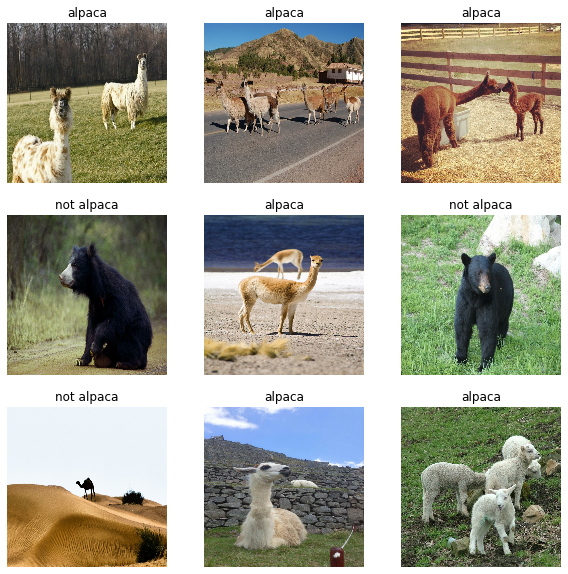

In [ ]:
# Get the names of each class from the dataset. In this case, the class is
# "alpaca" or "not alpaca"
class_names = train_dataset.class_names

# We'll take 9 images from the training dataset to plot
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### **Step #2: Defining the input shape of the data**
---

**Problem #1.1:** Define the input shape for the model. Remember we set the image size to 160x160 pixels.

In [ ]:
# Define the input shape for the model
input_shape = (32, 3, 3)

#### **Step #3-6: Building the Neural Network with Data Augmentation**
---


Data augmentation in keras is easy to implement. We can add special layers to our model that will do the augmentation for us. We just specify what kind of augmentation we want to do. In this case, we'll randomly flip some images horizontally and randomly rotate some as well.

The layers we will use are:
* `RandomFlip('horizontal')` (we could also choose vertical or both)
* `RandomRotation(0.2)` (the input here is the rotation angle in radians)


Just to see how this works, we'll set up a model that does data augmentation and nothing else.

*This code has been provided for you. Just run the cell below.*

In [ ]:
# Initialize the model normally
model_DA = Sequential()

# Add a layer that will add a random horizontal flip to the data
model_DA.add(RandomFlip('horizontal'))

# Add a layer that will randomly rotate the data
model_DA.add(RandomRotation(0.2))

Let's see the result of applying data augmentation. Do not worry about the syntax here, this is just for demonstration.

*The code below is provided for you. Just run the cell below.*

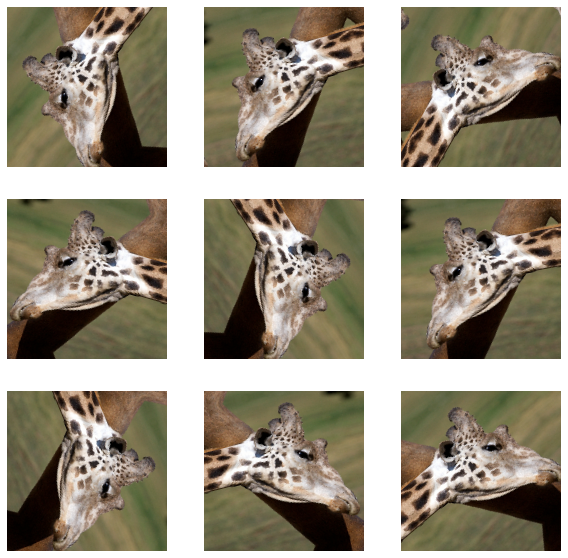

In [ ]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = model_DA(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

Now, we're ready to build our CNN!

**Problem #1.2:** Initialize a sequential neural network and add the two data augmentation layers as shown above.

In [ ]:
# Initialize the model
model = Sequential()

# Add a layer that will add a random horizontal flip to the data
model.add(RandomFlip('horizontal'))

# Add a layer that will randomly rotate the data
model.add(RandomRotation(0.2))

That's all! Now, we can build the rest of our CNN as we would normally.



**Problem #1.3:** Together, build a CNN with the following layers:

* A convolutional layer with 32 filters, filter size of (3,3), and ReLU activation. Make sure to pass the input shape as a parameter.
* A max pooling layer with a pool size of (2,2)
* A convolutional layer with 64 filters, filter size of (3,3), and ReLU activation.
* A max pooling layer with a pool size of (2,2)
* A flatten layer
* A dense layer with 256 neurons and ReLU activation
* An output layer


In [ ]:
# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=input_shape))

# Add a max pooling layer
model.add(MaxPooling2D((2,2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))

# Add a max pooling layer
model.add(MaxPooling2D((2,2)))

# Flatten the output from the convolutional layers
model.add(MaxPooling2D((2,2)))

# Add a fully connected layer
model.add(Dense(256, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

###### **Solution**

In [ ]:
# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(256, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

Let's take a look at the model summary.

In [ ]:
model.summary()

ValueError: ignored

#### **Step #7: Training the Neural Network**

---

Next, we will compile the network. We will use the same loss function, optimizer, and metric as last time.

*This code is provided for you. Just run the cell below.*

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10)

Epoch 1/10


ValueError: ignored

#### **Step #8: Evaluate the Model**
---
Let's see if the model was able to accurately classify whether each image was an alpaca or not.

*This code is provided for you. Just run the cells below.*

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# We'll take 9 images from the validation dataset to plot
plt.figure(figsize=(15, 15))
for x, y in validation_dataset.take(1):
    for i in range(9):
        prediction = model.predict(x)[i]
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(x[i].numpy().astype("uint8"))
        tmp2 = "predicted {:.0f}% alpaca, actually ".format(100*(1-prediction[0]), fontsize=14)
        plt.title(tmp2 + class_names[y[i].numpy()])
        plt.axis("off")

Clearly, our CNN isn't doing so well! Thankfully, for small data sets, there's a better way.

---

<center>

#### **Back to lecture**

---

---
### **Part #1.2: Using a Pre-Trained Model**
---

One way to improve our model would be to train it on more data. Unfortunately, we don't always have access to more data. In this part we will use **transfer learning** which means we will use a model that has been previously trained on a large dataset and modify it for our needs. Today, we will use the VGG16 model, which is a CNN with 16 layers that has been trained on the ImageNet dataset.


<br>

We are going to use the same data as before, we will just define and use a new model.

#### **Steps #3-6: Build a new neural network using a pre-trained model**
---




In [ ]:
# Initialize the model
new_model = Sequential()

# Add input layer
new_model.add(Input(shape=input_shape))

# Add data augmentation layers
new_model.add(RandomFlip('horizontal'))
new_model.add(RandomRotation(0.2))

# You do not need to worry about this step. But in case you are curious:
# The "Lambda" layer is another special layer that lets you apply a custom
# function to the data. Because we know we're going to use VGG16, we will use
# the same pre-processing function that was used when it was first trained.
new_model.add(
    Lambda(
        preprocess_input,
        name='preprocessing',
        input_shape=input_shape
    )
)

# Load a pre-trained model
VGG = VGG16(
    # we want to use our own final layers customized for our task
    include_top=False,
    input_shape=input_shape,
    weights='imagenet'
    )

# Freeze parameters each layer because we only want to train the final layers
for layer in VGG.layers:
  layer.trainable = False

# Add the pre-trained model to our model
new_model.add(VGG)

# Add a flattening layer
new_model.add(Flatten())

# Add a fully connected layer
new_model.add(Dense(256, activation='relu'))

# Add the output layer
new_model.add(Dense(1, activation='sigmoid'))

new_model.summary()


In [ ]:
new_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

history = new_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10)

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# We'll take 9 images from the validation dataset to plot
plt.figure(figsize=(15, 15))
for x, y in validation_dataset.take(1):
    for i in range(9):
        prediction = new_model.predict(x)[i]
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(x[i].numpy().astype("uint8"))
        tmp2 = "predicted {:.0f}% alpaca, actually ".format(100*(1-prediction[0]), fontsize=14)
        plt.title(tmp2 + class_names[y[i].numpy()])
        plt.axis("off")

---

<center>

#### **Back to lecture**

---

In [ ]:
#@title Before continuing to Part 2, run this cell below for necessary imports. {display-mode: "form"}


!pip install --quiet git+https://github.com/divamgupta/image-segmentation-keras
!wget --quiet https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip -qq dataset1.zip

from keras_segmentation.models.unet import vgg_unet

---
## **Part 2: Car Camera Image Segmentation**
---

Below, we have provided code for you to see image segmentation in action. This task was accomplished using a pre-trained **U-Net** model, which is a special kind of CNN developed for biomedical image segmentation.

Just run the code below to see the result. It may take a few minutes.

In [ ]:
# The image we are going to segment
Image("dataset1/images_prepped_test/0016E5_07965.png")

All the code is provided for you. Just run the cell below. This may take several minutes to run.

In [ ]:
model = vgg_unet(n_classes=50, input_height=320, input_width=640)

model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1",
    epochs=5
)

output = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png", overlay_img=True, show_legends=True,
    class_names = [ "Sky", "Building", "Pole", "Road", "Pavement", "Tree", "SignSymbol", "Fence", "Car", "Pedestrian", "Bicyclist"]

)

Image('/tmp/out.png')

---

<center>

#### **Back to lecture**

---

#End of notebook
---
© 2023 The Coding School, All rights reserved